In [1]:
import numpy as np

In [2]:
import linefinder.analyze_data.worldlines as worldlines
import linefinder.analyze_data.plot_worldlines as plot_worldlines

In [61]:
import galaxy_dive.plot_data.plotting as plotting

# Load the Data

In [3]:
w = worldlines.Worldlines(
    data_dir = '/scratch/03057/zhafen/linefinder_data/multiphysics/m12i_res7100_mhdcv/data',
    tag = 'm12imhdcv_clustersofFIRE_pop1',
    halo_data_dir = '/scratch/03057/zhafen/multiphysics/m12i_res7100_mhdcv/halo',
    main_halo_id = 0,
)

In [4]:
w_plotter = plot_worldlines.WorldlinesPlotter( w, )

In [5]:
# We'll explore classifications relative to this snapshot
snum = 600
ind = snum - 600

# Explore the Data

## What Fraction of IDs are Still Gas by $z=0$?

In [6]:
p_types = w.get_data( 'PType' )
n_stars = np.sum( p_types[:,ind] == 4 )
n_gas = np.sum( p_types[:,ind] == 0 )
n_stars, n_gas

(100000, 0)

Good, these are all stars by $z=0$

## Look at Radial History versus Time for a Few Particles

### Plot

In [27]:
gas_to_star_line_features = {
    'is_star': {
        'key': 'PType',
        'value': 4,
        'data_kwargs': {},
        'line_attrs': {
            'linewidth': 3,
            'color': 'k',
            },
    },
    'is_gas': {
        'key': 'PType',
        'value': 0,
        'data_kwargs': {},
        'line_attrs': {
            'linewidth': 2,
            'color': 'k',
            'linestyle': '--',
            },
        }
}

> /home1/03057/zhafen/repos/linefinder/linefinder/analyze_data/plot_worldlines.py(761)plot_streamlines()
-> z_data = np.linspace(0., 1., x_data.shape[1] )


(Pdb)  c


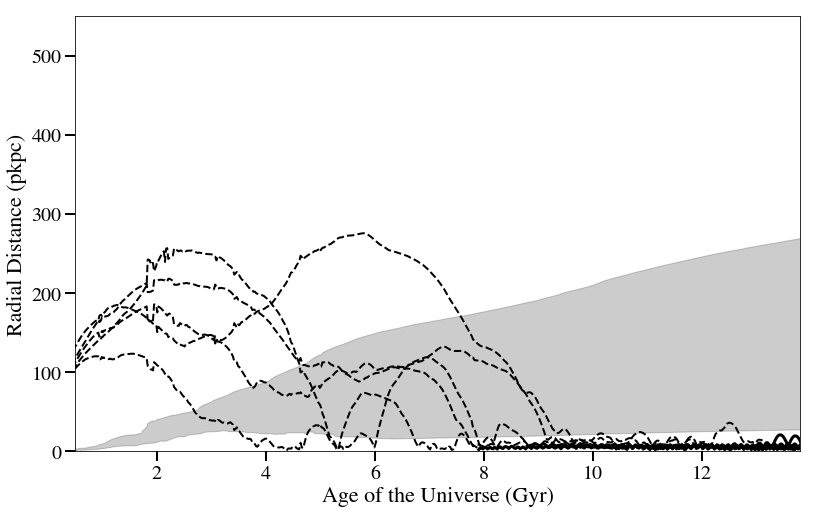

In [45]:
fig = plt.figure( figsize=(13,8), facecolor='w' )
ax = plt.gca()

w_plotter.plot_streamlines_vs_time(
    y_key = 'R',
    classification = 'is_in_main_gal', # Make sure we select particles in the main galaxy at z=0
    classification_ind = ind,
    start_ind = 0,
    end_ind = 600,
    sample_size = 5,
#     y_data_kwargs = { 'smooth_data' : True },
    ax = ax,
    x_range = [0.5, 13.8 ],
    y_range = [0., 550., ],
    horizontal_line_value = None,
    plot_CGM_region = True,
    return_y_max = True,
    vert_line_ind = None,
    line_features = gas_to_star_line_features,
)

fig

File saved at ./plots/r_vs_time_ind33.pdf


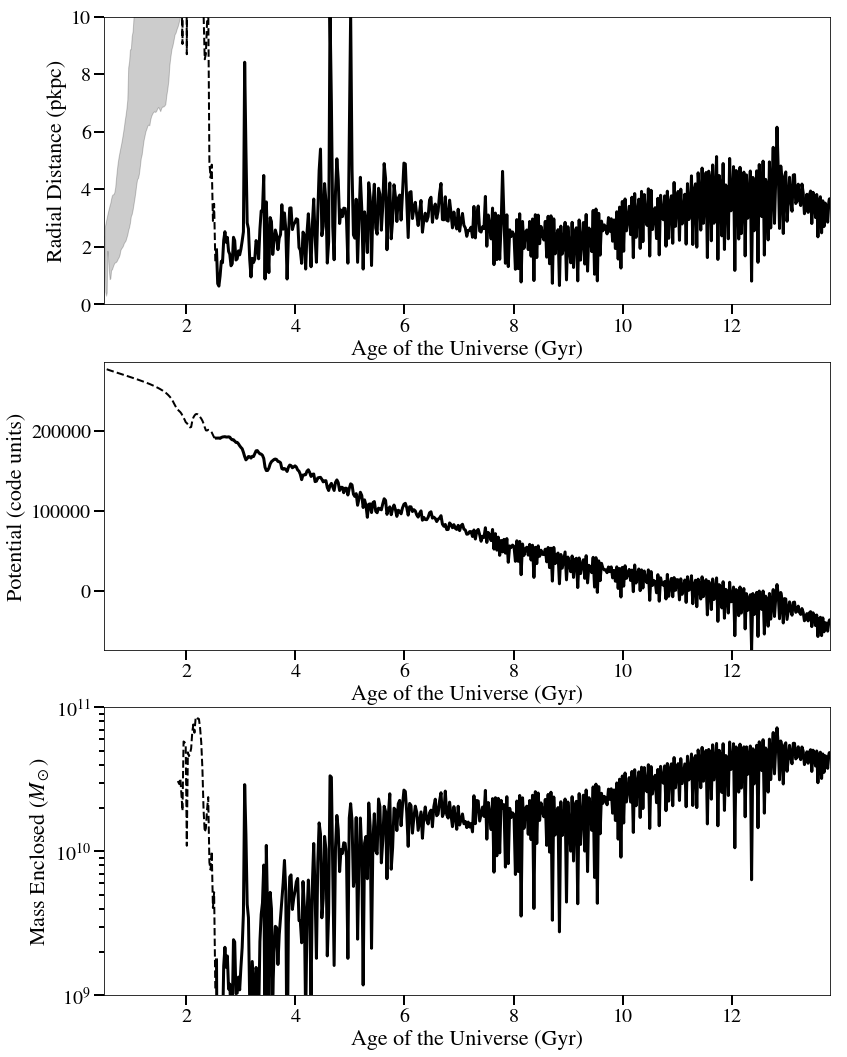

In [99]:
n_rows = 3

fig = plt.figure( figsize=(13,6*n_rows), facecolor='w' )
ax = plt.gca()

gs = matplotlib.gridspec.GridSpec(n_rows,1)

sample_ind = 33
sample_inds = [ sample_ind, ]

shared_args = {
    'classification_ind': ind,
    'start_ind': 1,
    'end_ind': 600,
    'sample_size': 1,
    'sample_inds': sample_inds,
    'horizontal_line_value': None,
    'vert_line_ind': None,
    'line_features': gas_to_star_line_features,
}

w_plotter.plot_streamlines_vs_time(
    y_key = 'R',
    ax = plt.subplot(gs[0,0]),
    x_range = [0.5, 13.8 ],
    y_range = [0., 10., ],
    plot_CGM_region = True,
    **shared_args
)

w_plotter.plot_streamlines_vs_time(
    y_key = 'Potential',
    ax = plt.subplot(gs[1,0]),
    x_range = [0.5, 13.8 ],
#     y_range = [0., 30., ],
    y_label = 'Potential (code units)',
    **shared_args
)

w_plotter.plot_streamlines_vs_time(
    y_key = 'M_enc',
    ax = plt.subplot(gs[2,0]),
    x_range = [0.5, 13.8 ],
    y_range = [1e9, 1e11, ],
    y_scale = 'log',
    y_label = r'Mass Enclosed ($M_\odot$)',
    **shared_args
)

save_file = 'r_vs_time_ind{}.pdf'.format( sample_ind )
plotting.save_fig(
    out_dir = './plots',
    save_file = save_file,
    fig = fig,
)

fig